In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pyemma

In [280]:
data = np.load('../data/dx_3.00.npy')
#data = data.T[0]
#steps = data.shape[0]
#zeros = np.zeros(steps)
#data = np.vstack((data, zeros)).T
print(data)

[[ 3.          0.        ]
 [ 1.81084253 -1.03481204]
 [ 1.97067978 -0.8291294 ]
 ...
 [-1.15445126 -0.63990311]
 [-1.88523934 -0.08623815]
 [-2.02380094 -0.47022847]]


In [281]:
cluster = pyemma.coordinates.cluster_kmeans(data, k=2, max_iter=100)

In [282]:
%%capture
lags = np.arange(1, 1000, 100).astype(int)
its = pyemma.msm.its(cluster.dtrajs, lags=lags, nits=1, errors='bayes')

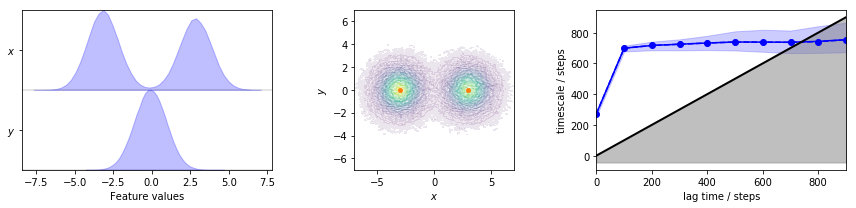

In [283]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
pyemma.plots.plot_feature_histograms(data, feature_labels=['$x$', '$y$'], ax=axes[0])
pyemma.plots.plot_density(*data.T, ax=axes[1], cbar=False, alpha=0.1)
axes[1].scatter(*cluster.clustercenters.T, s=15, c='C1')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_xlim(-7, 7)
axes[1].set_ylim(-7, 7)
axes[1].set_aspect('equal')
pyemma.plots.plot_implied_timescales(its, ylog=False, ax=axes[2])
fig.tight_layout()

In [284]:
its.timescales

array([[273.37884798],
       [699.3556652 ],
       [717.06145622],
       [725.09796571],
       [733.1289353 ],
       [739.49443405],
       [738.78657581],
       [738.13280804],
       [743.44820106],
       [755.08385312]])

In [277]:
a = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=600)
b = a.count_matrix_full.astype(int)

In [278]:
print(b)
diff_perc = np.abs(b[0,0] - b[1,1])/b[1,1] * 100
print('Relative error: {:0.3f}%'.format(diff_perc))

[[234144  32616]
 [ 33216 199424]]
Relative error: 17.410%


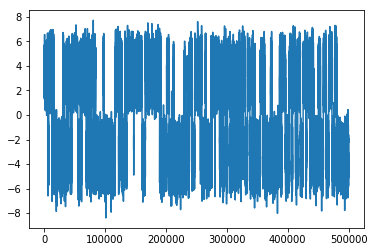

In [279]:
plt.plot(data[:,0])

In [365]:
data, cluster, lags, its, timescales = [], [], [], [], []
mus = np.arange(3, 4.1, 0.1)
for i, mu in enumerate(mus):
    data.append(np.load('../data/dx_{:0.2f}.npy'.format(mu)))
    cluster.append(pyemma.coordinates.cluster_kmeans(data[-1], k=2, max_iter=100))
    lags.append(np.arange(1, 1000*(i+1), 100*(i+1)).astype(int))
    its.append(pyemma.msm.its(cluster[-1].dtrajs, lags=lags[-1], nits=1, errors='bayes'))
    timescales.append(its[-1].timescales)

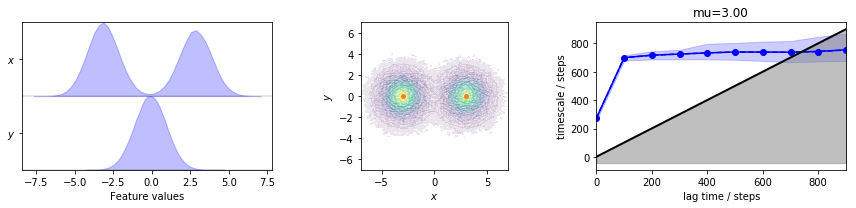

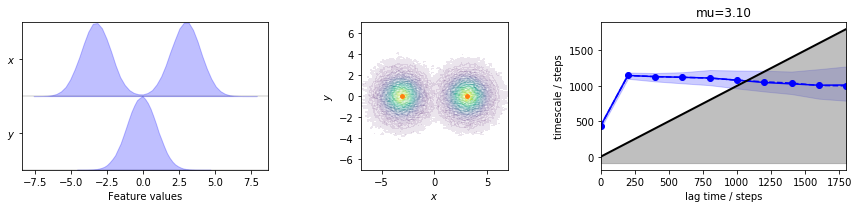

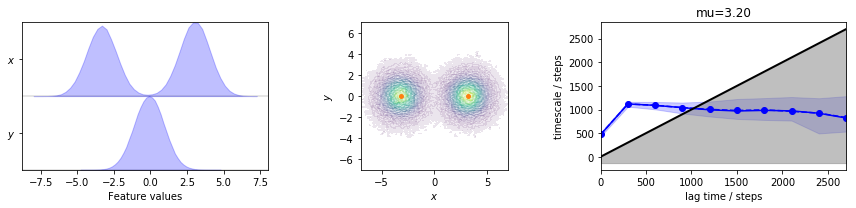

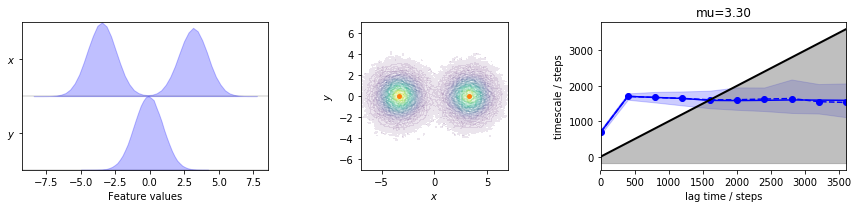

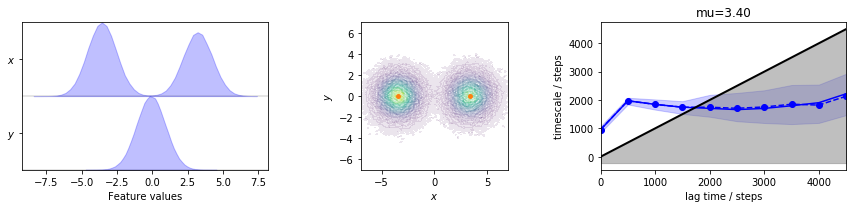

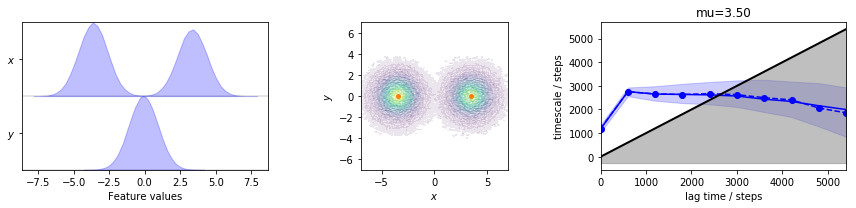

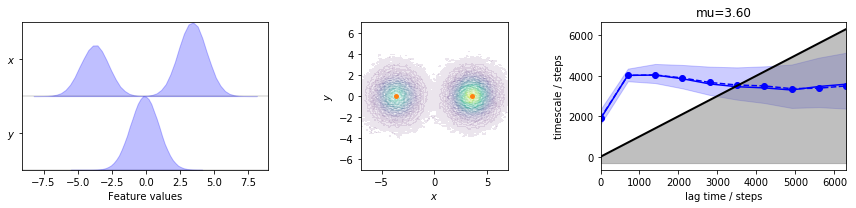

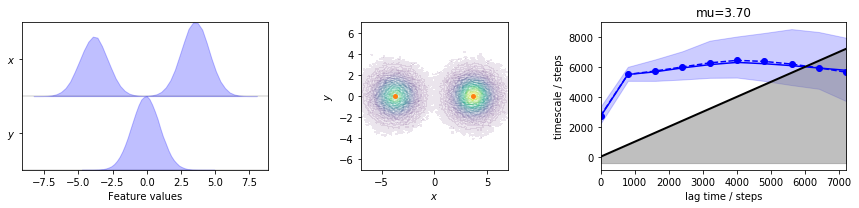

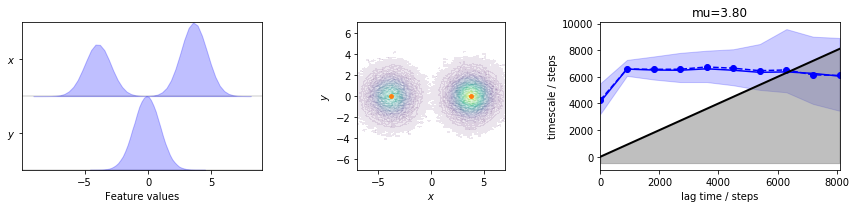

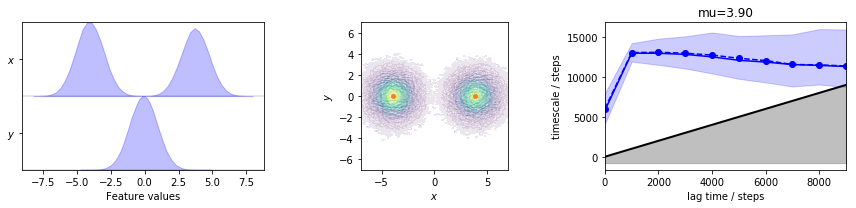

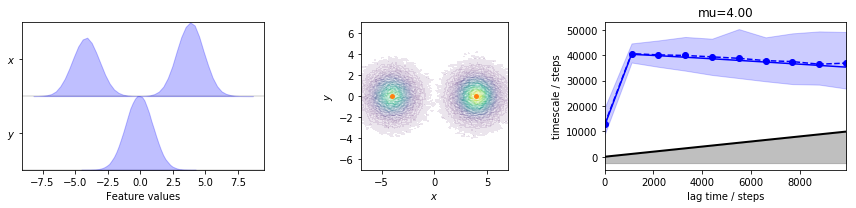

In [366]:
for i, mu in enumerate(mus):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    plt.title('mu={:0.2f}'.format(mu))
    pyemma.plots.plot_feature_histograms(data[i], feature_labels=['$x$', '$y$'], ax=axes[0])
    pyemma.plots.plot_density(*data[i].T, ax=axes[1], cbar=False, alpha=0.1)
    axes[1].scatter(*cluster[i].clustercenters.T, s=15, c='C1')
    axes[1].set_xlabel('$x$')
    axes[1].set_ylabel('$y$')
    axes[1].set_xlim(-7, 7)
    axes[1].set_ylim(-7, 7)
    axes[1].set_aspect('equal')
    pyemma.plots.plot_implied_timescales(its[i], ylog=False, ax=axes[2])
    fig.tight_layout()

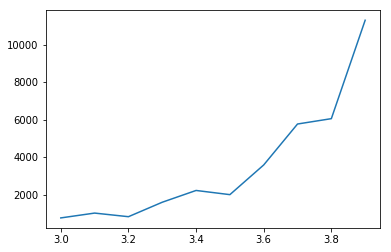

In [367]:
ts = np.zeros(10)
for i in range(10):
    ts[i] = timescales[i][-1][0]
plt.plot(mus[:-1], ts)